Python for Data & Analytics<br>
Chapter 19

*** requires datafiles: customers.csv, status.csv

19.2 Data Preparation

In [1]:
import pandas as pd
customers = pd.read_csv('customers.csv', index_col='#')
customers.head()

,gender,married,age,service,contract,billing,due
#,,,,,,,
1,f,m,49,p,n,a,0
2,f,m,19,p,n,c,0
3,m,m,53,p,y,a,1
4,f,m,64,g,y,a,1
5,f,s,47,b,n,a,0


In [2]:
status = pd.read_csv('status.csv', index_col='#')
status.head()

,churn
#,
1,0
2,0
3,1
4,1
5,1


In [3]:
customers = customers.join(status)
customers.head()

,gender,married,age,service,contract,billing,due,churn
#,,,,,,,,
1,f,m,49,p,n,a,0,0
2,f,m,19,p,n,c,0,0
3,m,m,53,p,y,a,1,1
4,f,m,64,g,y,a,1,1
5,f,s,47,b,n,a,0,1


In [4]:
len(customers)

10000

In [5]:
customers['gender_binary'] = customers.gender.map( {'m':0, 'f':1})
customers['married_binary'] = customers.married.map( {'s':0, 'm':1})
customers['contract_binary'] = customers.contract.map({'n':0, 'y':1})
customers['billing_binary'] = customers.billing.map( {'c':0, 'a':1})
customers.head()

,gender,married,age,service,contract,billing,due,churn,gender_binary,married_binary,contract_binary,billing_binary
#,,,,,,,,,,,,
1,f,m,49,p,n,a,0,0,1,1,0,1
2,f,m,19,p,n,c,0,0,1,1,0,0
3,m,m,53,p,y,a,1,1,0,1,1,1
4,f,m,64,g,y,a,1,1,1,1,1,1
5,f,s,47,b,n,a,0,1,1,0,0,1


In [6]:
customers['service_premium_binary'] = \
customers.service.map({'b':0, 'p':1, 'g':0})
customers['service_gold_binary'] = \
customers.service.map({'b':0, 'p':0, 'g':1})
customers[['service', 'service_premium_binary', 'service_gold_binary']].head()

,service,service_premium_binary,service_gold_binary
#,,,
1,p,1,0
2,p,1,0
3,p,1,0
4,g,0,1
5,b,0,0


19.3 Selecting the Factors

In [7]:
import statsmodels as sm

In [8]:
X = customers[['age', 'gender_binary', 'married_binary',
               'service_premium_binary', 'service_gold_binary',
               'contract_binary', 'billing_binary', 'due'
             ]]

In [9]:
from statsmodels.api import add_constant
X = add_constant(X)
X['const'].head()

/Users/dgroner/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: const, dtype: float64

In [10]:
y = customers.churn

In [11]:
from statsmodels.api import Logit
logreg1 = Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.621024
         Iterations 5


In [12]:
logreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                 0.04017
Time:                        20:46:12   Log-Likelihood:                -6210.2
converged:                       True   LL-Null:                       -6470.1
Covariance Type:            nonrobust   LLR p-value:                4.034e-107
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1323      0.083      1.593      0.111      -0.030       0.295
age                       -0.0035      0.001     -2.949      0.003      -0.006      -0.001
gender_binary             -0.0192      0.043     -0.446      0.655      -0.104       0.065
married_binary            -0.0988      0.044     -2.254      0.024      -0.185      -0.013
service_premium_binary    -0.2277      0.051     -4.452      0.000      -0.328      -0.127
service_gold_binary       -0.4073      0.056     -7.279      0.000      -0.517      -0.298
contract_binary           -0.6625      0.043    -15.301      0.000      -0.747      -0.578
billing_binary            -0.3220      0.043     -7.458      0.000      -0.407      -0.237
due                        0.4204      0.032     13.154      0.000       0.358       0.483
==========================================================================================
"""

In [13]:
X.drop('gender_binary', axis=1, inplace=True)

In [14]:
logreg2 = Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.621034
         Iterations 5


In [15]:
logreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Jul 2022   Pseudo R-squ.:                 0.04015
Time:                        20:46:12   Log-Likelihood:                -6210.3
converged:                       True   LL-Null:                       -6470.1
Covariance Type:            nonrobust   LLR p-value:                4.976e-108
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1229      0.080      1.530      0.126      -0.035       0.280
age                       -0.0035      0.001     -2.957      0.003      -0.006      -0.001
married_binary            -0.0989      0.044     -2.257      0.024      -0.185      -0.013
service_premium_binary    -0.2273      0.051     -4.446      0.000      -0.328      -0.127
service_gold_binary       -0.4074      0.056     -7.281      0.000      -0.517      -0.298
contract_binary           -0.6623      0.043    -15.298      0.000      -0.747      -0.577
billing_binary            -0.3219      0.043     -7.457      0.000      -0.407      -0.237
due                        0.4206      0.032     13.162      0.000       0.358       0.483
==========================================================================================
"""

19.4 Fitting the Model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
round(y_train.value_counts() / len(y_train) * 100)

0    65.0
1    35.0
Name: churn, dtype: float64

In [18]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

LogisticRegression()

In [19]:
logisticRegression.intercept_

array([0.08719319])

In [20]:
logisticRegression.coef_

array([[ 0.08748334, -0.0042766 , -0.11523966, -0.25986953, -0.41815953,
        -0.64980243, -0.30744573,  0.43194216]])

19.5 Predicting with the Model

In [21]:
logicPredict = logisticRegression.predict_proba(X_test)

In [22]:
logicPredict

array([[0.72596709, 0.27403291],
       [0.78930094, 0.21069906],
       [0.37359844, 0.62640156],
       ...,
       [0.64044751, 0.35955249],
       [0.49482045, 0.50517955],
       [0.58254648, 0.41745352]])

In [23]:
y_test_proba = logicPredict[:,1]

<AxesSubplot:>

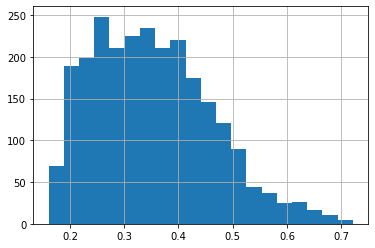

In [24]:
series = pd.Series(y_test_proba)
series.hist(bins=20)

19.6 Reviewing Model Accuracy

In [25]:
# for a cutoff, determine if prediction would be 0 or 1 for each observation
cutoff = .5 # sample cutoff, can set to any value between 0 and 1
y_test_proba_series = pd.Series(y_test_proba)
y_test_pred = y_test_proba_series.apply(lambda x: 1 if x>cutoff else 0)
y_test_pred.head(5)

0    0
1    0
2    1
3    0
4    0
dtype: int64

In [26]:
# given truth and the model+cutoff prediction, generate a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[1516,  121],
       [ 741,  122]])

In [27]:
# convenience function for calculating any confusion matrix ratio
def cmratio(correct, incorrect):
   if correct+incorrect == 0: return 0
   else: return correct / (correct+incorrect) * 100

# display confusion matrix
def displayCM(cm, w=4):
   accuracy = cmratio(cm[0][0]+cm[1][1], cm[0][1]+cm[1][0])
   sensitivity = cmratio(cm[1][1], cm[1][0])
   specificity = cmratio(cm[0][0], cm[0][1])
   precision = cmratio(cm[1][1], cm[0][1])
   npv = cmratio(cm[0][0], cm[1][0])
   fmt = str(w)+"d"
   fmt1 = ".1f"
   print(' TP:', format(cm[1][1],fmt), 'FN:',
      format(cm[1][0],fmt), format(sensitivity,fmt1))
   print(' FP:', format(cm[0][1],fmt), 'TN:',
      format(cm[0][0],fmt), format(specificity,fmt1))
   print(' ', format(precision,fmt1), ' ', format(npv, fmt1))
   print('Accuracy:', format(accuracy, fmt1))

In [28]:
displayCM(cm)

 TP:  122 FN:  741 14.1
 FP:  121 TN: 1516 92.6
  50.2   67.2
Accuracy: 65.5


19.7 Setting the Model Threshold

In [29]:
# parametric analysis of cutoff vs. profit&loss
from numpy import arange
pls_x = []
pls_y = []
print('cutoff', 'P&L ($)')
for cutoff in arange(.05, .99, .05):
   y_test_pred = y_test_proba_series.apply(lambda x: 1 if x>cutoff else 0)
   cm = confusion_matrix(y_test, y_test_pred)
   # example P&L function based on model predict=1 column
   # true + (retention): $500/customer, assume 25% re-subscribe (take offer)
   # false + (unneeded discount): $120/customer, assume 60% take offer
   pl = cm[1][1] * 500 * .25 -cm[0][1] * 120 * .65
   print(format(cutoff,'.2f'), format(pl,'9,.0f'))
   # store values for subsequent plotting
   pls_x.append(cutoff)
   pls_y.append(pl)

cutoff P&L ($)
0.05   -19,811
0.10   -19,811
0.15   -19,811
0.20   -11,873
0.25    -1,830
0.30     9,133
0.35    13,567
0.40    13,600
0.45     9,108
0.50     5,812
0.55     4,663
0.60     3,003
0.65       970
0.70       250
0.75         0
0.80         0
0.85         0
0.90         0
0.95         0


<AxesSubplot:xlabel='cutoff', ylabel='pl'>

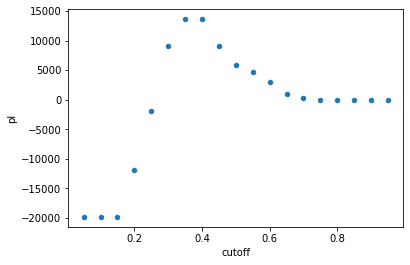

In [30]:
pl_df = pd.DataFrame({'cutoff':pls_x, 'pl':pls_y})
pl_df.plot(x='cutoff', y='pl', kind='scatter')

Code from: Python for Data & Analytics, (c) 2023 Rose River Software, LLC